In [111]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] =10,6


In [112]:
dataset = pd.read_excel('ImportExportData.xlsx',sheet_name='Sheet2')
ied = dataset
print(dataset)
locationAmnth =dataset.iloc[:, :]

print(locationAmnth)

locationAmnth['Month'] = pd.to_datetime(locationAmnth['Month'], infer_datetime_format=True)
indexedDataset = locationAmnth.set_index(['Month'])

        Month  Export
0  2018-01-01    1264
1  2018-02-01     844
2  2018-03-01    1430
3  2018-04-01    1247
4  2018-05-01    1101
5  2018-06-01    1499
6  2018-07-01    1074
7  2018-08-01    1349
8  2018-09-01    1362
9  2018-10-01    1140
10 2018-11-01    1034
11 2018-12-01    1766
12 2019-01-01    2811
13 2019-02-01    2450
14 2019-03-01    3106
15 2019-04-01    1831
16 2019-05-01    1224
17 2019-06-01    1541
18 2019-07-01    1619
19 2019-08-01    1728
20 2019-09-01    1681
21 2019-10-01    1424
22 2019-11-01    1411
23 2019-12-01    1311
        Month  Export
0  2018-01-01    1264
1  2018-02-01     844
2  2018-03-01    1430
3  2018-04-01    1247
4  2018-05-01    1101
5  2018-06-01    1499
6  2018-07-01    1074
7  2018-08-01    1349
8  2018-09-01    1362
9  2018-10-01    1140
10 2018-11-01    1034
11 2018-12-01    1766
12 2019-01-01    2811
13 2019-02-01    2450
14 2019-03-01    3106
15 2019-04-01    1831
16 2019-05-01    1224
17 2019-06-01    1541
18 2019-07-01    1619
19 2019-08

In [113]:
from datetime import datetime
indexedDataset.tail(5)

,Export
Month,
2019-08-01,1728
2019-09-01,1681
2019-10-01,1424
2019-11-01,1411
2019-12-01,1311


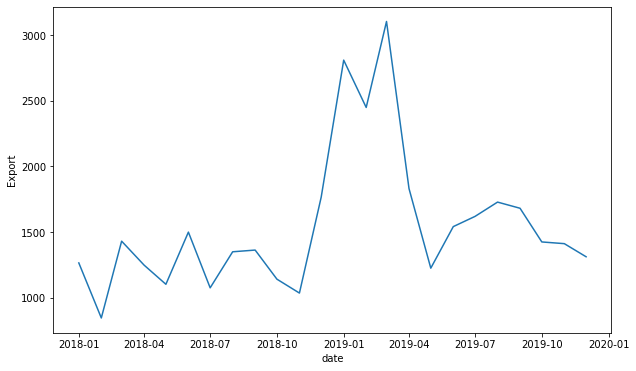

In [114]:
plt.xlabel('date')
plt.ylabel('Export')
plt.plot(indexedDataset)

In [115]:
rolmean = indexedDataset.rolling(window=12).mean()
rolstd = indexedDataset.rolling(window=12).std()
print(rolmean,rolstd)

                 Export
Month                  
2018-01-01          NaN
2018-02-01          NaN
2018-03-01          NaN
2018-04-01          NaN
2018-05-01          NaN
2018-06-01          NaN
2018-07-01          NaN
2018-08-01          NaN
2018-09-01          NaN
2018-10-01          NaN
2018-11-01          NaN
2018-12-01  1259.166667
2019-01-01  1388.083333
2019-02-01  1521.916667
2019-03-01  1661.583333
2019-04-01  1710.250000
2019-05-01  1720.500000
2019-06-01  1724.000000
2019-07-01  1769.416667
2019-08-01  1801.000000
2019-09-01  1827.583333
2019-10-01  1851.250000
2019-11-01  1882.666667
2019-12-01  1844.750000                 Export
Month                 
2018-01-01         NaN
2018-02-01         NaN
2018-03-01         NaN
2018-04-01         NaN
2018-05-01         NaN
2018-06-01         NaN
2018-07-01         NaN
2018-08-01         NaN
2018-09-01         NaN
2018-10-01         NaN
2018-11-01         NaN
2018-12-01  244.757332
2019-01-01  510.587622
2019-02-01  562.817661
2019-03-

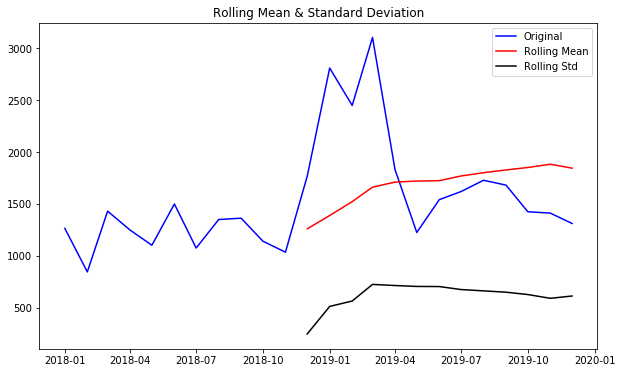

In [116]:
#plot rollling statistics
orig = plt.plot(indexedDataset, color='blue', label = 'Original')
mean = plt.plot(rolmean, color='red', label = 'Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block = False)

In [117]:
#Dickey Fuller Test
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey Fuller Test:')
dftest = adfuller(indexedDataset['Export'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistics', 'p-value','#Lags Used', 'Number of Observations Used' ])

for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)



Results of Dickey Fuller Test:
Test Statistics                -2.309443
p-value                         0.168940
#Lags Used                      0.000000
Number of Observations Used    23.000000
Critical Value (1%)            -3.752928
Critical Value (5%)            -2.998500
Critical Value (10%)           -2.638967
dtype: float64


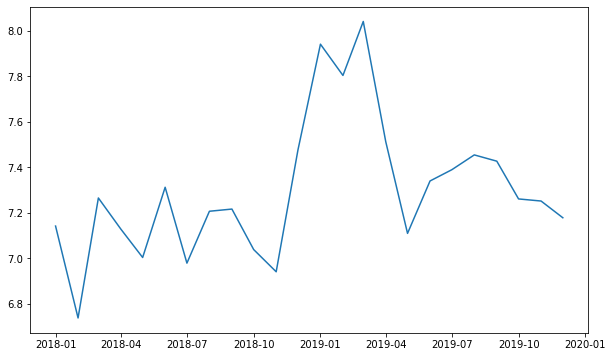

In [118]:
#Estimating Trend
indexedDataset_logScale = np.log(indexedDataset)
plt.plot(indexedDataset_logScale)


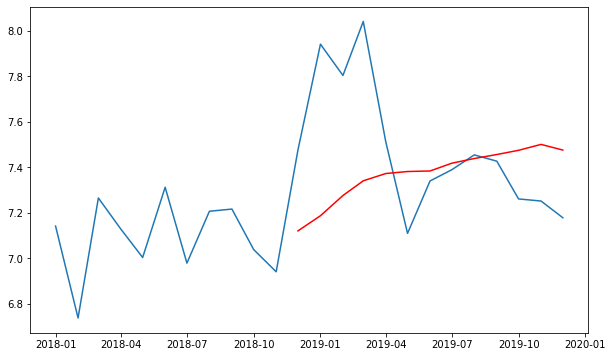

In [119]:
movingAverage = indexedDataset_logScale.rolling(window=12).mean()
movingSTD = indexedDataset_logScale.rolling(window=12).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage, color='red')

#time series still not stationary

In [120]:
datasetlogScaleandMovingAverage = indexedDataset_logScale - movingAverage
datasetlogScaleandMovingAverage.head(12)

datasetlogScaleandMovingAverage.dropna(inplace=True)
datasetlogScaleandMovingAverage.head(10)

,Export
Month,
2018-12-01,0.355634
2019-01-01,0.753852
2019-02-01,0.527592
2019-03-01,0.700202
2019-04-01,0.139718
2019-05-01,-0.271846
2019-06-01,-0.043841
2019-07-01,-0.028665
2019-08-01,0.015857


In [121]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determining Rolling Statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    #plot rollling statistics
    orig = plt.plot(indexedDataset, color='blue', label = 'Original')
    mean = plt.plot(rolmean, color='red', label = 'Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block = False)
    
    #Perform Dickey Fuller Test
    from statsmodels.tsa.stattools import adfuller
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(indexedDataset['Export'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistics', 'p-value','#Lags Used', 'Number of Observations Used' ])

    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    
    print(dfoutput)
    
    

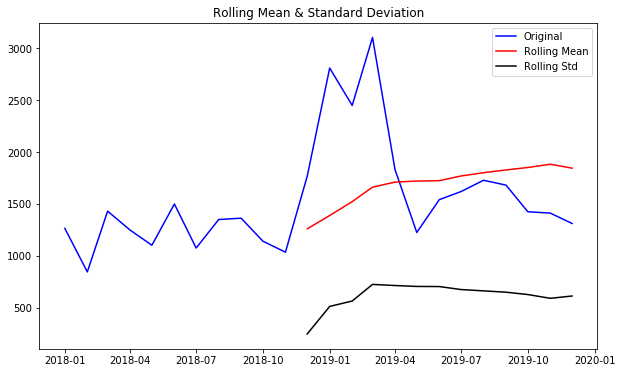

Results of Dickey Fuller Test:
Test Statistics                -2.309443
p-value                         0.168940
#Lags Used                      0.000000
Number of Observations Used    23.000000
Critical Value (1%)            -3.752928
Critical Value (5%)            -2.998500
Critical Value (10%)           -2.638967
dtype: float64


In [122]:
test_stationarity(datasetlogScaleandMovingAverage)

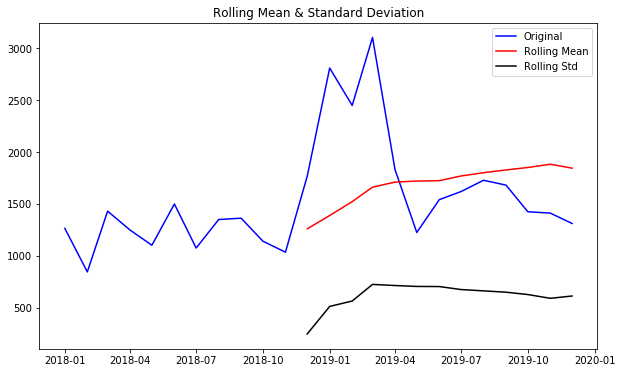

Results of Dickey Fuller Test:
Test Statistics                -2.309443
p-value                         0.168940
#Lags Used                      0.000000
Number of Observations Used    23.000000
Critical Value (1%)            -3.752928
Critical Value (5%)            -2.998500
Critical Value (10%)           -2.638967
dtype: float64


In [123]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determining Rolling Statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    #plot rollling statistics
    orig = plt.plot(indexedDataset, color='blue', label = 'Original')
    mean = plt.plot(rolmean, color='red', label = 'Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block = False)
    
    #Perform Dickey Fuller Test
    from statsmodels.tsa.stattools import adfuller
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(indexedDataset['Export'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistics', 'p-value','#Lags Used', 'Number of Observations Used' ])

    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    
    print(dfoutput)
    
test_stationarity(datasetlogScaleandMovingAverage)    

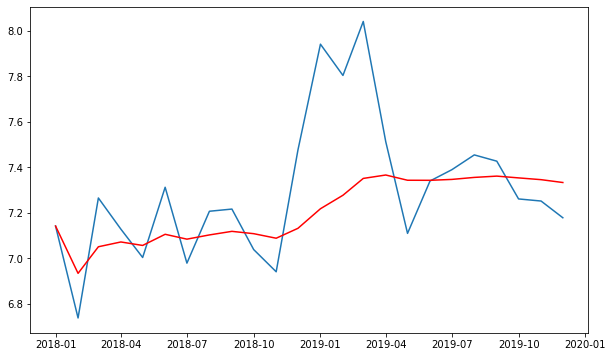

In [124]:
exponentialDecayWeightedAverage = indexedDataset_logScale.ewm(halflife=12,min_periods=0, adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage, color='red')

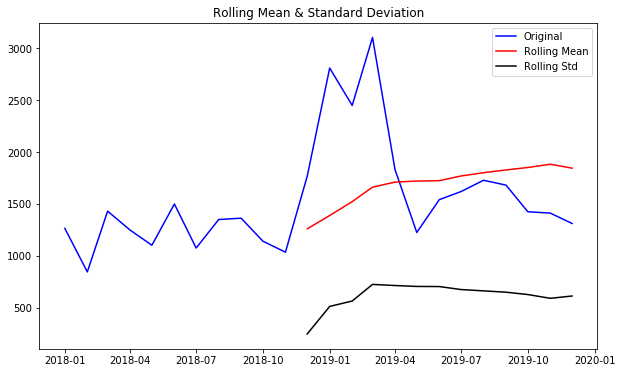

Results of Dickey Fuller Test:
Test Statistics                -2.309443
p-value                         0.168940
#Lags Used                      0.000000
Number of Observations Used    23.000000
Critical Value (1%)            -3.752928
Critical Value (5%)            -2.998500
Critical Value (10%)           -2.638967
dtype: float64


In [125]:
datasetlogScaleandMovingexponentialDecayAverage = indexedDataset_logScale - exponentialDecayWeightedAverage
test_stationarity(datasetlogScaleandMovingexponentialDecayAverage)

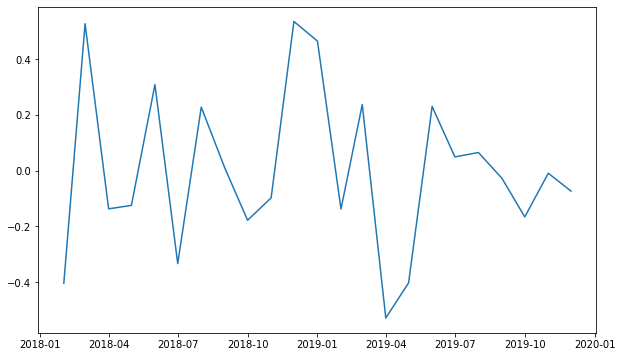

In [126]:
datasetlogOffShifting = indexedDataset_logScale - indexedDataset_logScale.shift()
plt.plot(datasetlogOffShifting)

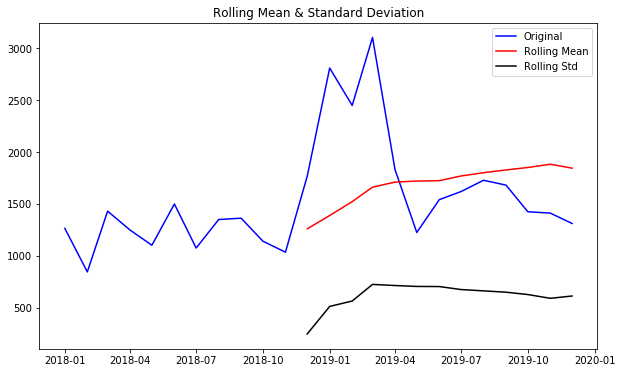

Results of Dickey Fuller Test:
Test Statistics                -2.309443
p-value                         0.168940
#Lags Used                      0.000000
Number of Observations Used    23.000000
Critical Value (1%)            -3.752928
Critical Value (5%)            -2.998500
Critical Value (10%)           -2.638967
dtype: float64


In [127]:
datasetlogOffShifting.dropna(inplace=True)
test_stationarity(datasetlogOffShifting)

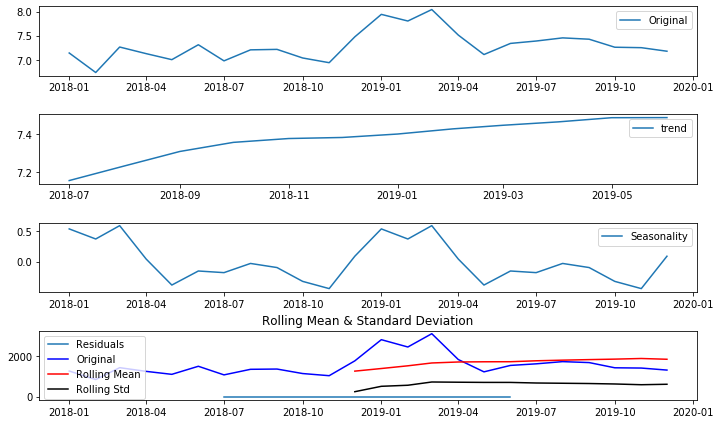

Results of Dickey Fuller Test:
Test Statistics                -2.309443
p-value                         0.168940
#Lags Used                      0.000000
Number of Observations Used    23.000000
Critical Value (1%)            -3.752928
Critical Value (5%)            -2.998500
Critical Value (10%)           -2.638967
dtype: float64


In [128]:
#components of timeseries
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexedDataset_logScale)

trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid


plt.subplot(411)
plt.plot(indexedDataset_logScale, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

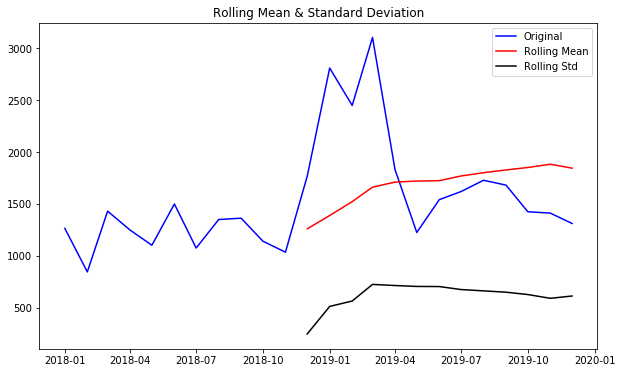

Results of Dickey Fuller Test:
Test Statistics                -2.309443
p-value                         0.168940
#Lags Used                      0.000000
Number of Observations Used    23.000000
Critical Value (1%)            -3.752928
Critical Value (5%)            -2.998500
Critical Value (10%)           -2.638967
dtype: float64


In [129]:
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

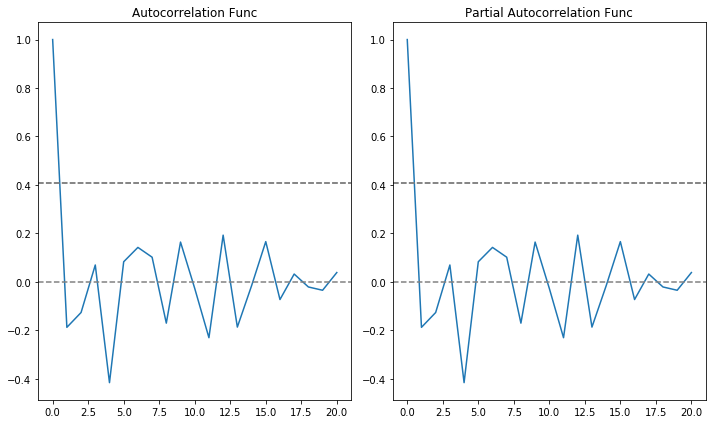

In [130]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(datasetlogOffShifting, nlags=20)
lag_pacf = pacf(datasetlogOffShifting, nlags=20, method='ols')

#Plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetlogOffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetlogOffShifting)), linestyle='--', color='gray')
plt.title('Autocorrelation Func')

#Plot PACF
plt.subplot(122)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetlogOffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetlogOffShifting)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Func')
plt.tight_layout()
                          
                          

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Plotting AR Model


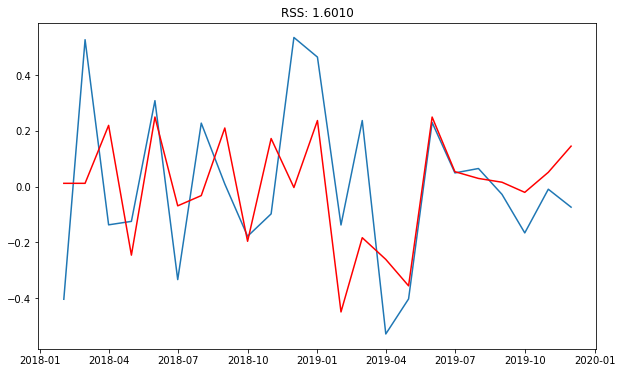

In [131]:
from statsmodels.tsa.arima_model import ARIMA

#AR MODEL
model=ARIMA(indexedDataset_logScale, order=(0,1,2))
results_AR = model.fit(disp=-1)
plt.plot(datasetlogOffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-datasetlogOffShifting['Export'])**2))
print('Plotting AR Model')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting AR Model


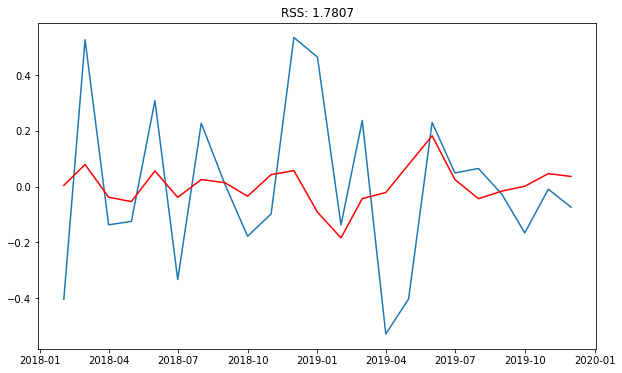

In [132]:
#MA MODEL
model=ARIMA(indexedDataset_logScale, order=(2,1,0))
results_MA = model.fit(disp=-1)
plt.plot(datasetlogOffShifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-datasetlogOffShifting['Export'])**2))
print('Plotting AR Model')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Text(0.5, 1.0, 'RSS: 1.4344')

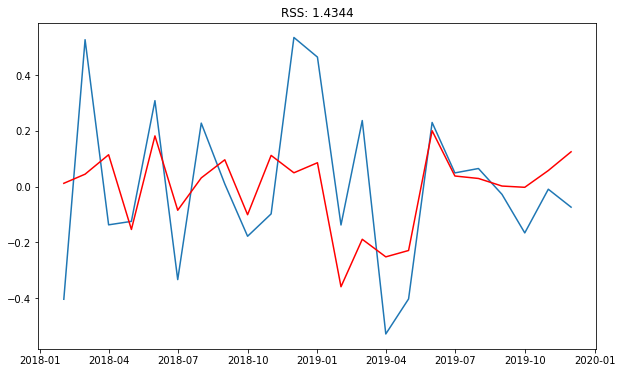

In [133]:
model=ARIMA(indexedDataset_logScale, order=(2,1,2))
results_ARIMA = model.fit(disp=-1)
plt.plot(datasetlogOffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-datasetlogOffShifting['Export'])**2))


In [134]:
pridictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(pridictions_ARIMA_diff.head())

Month
2018-02-01    0.012027
2018-03-01    0.044807
2018-04-01    0.114544
2018-05-01   -0.153545
2018-06-01    0.182143
dtype: float64


In [135]:
#Convert to Cummulative Sum
pridictions_ARIMA_diff_cumsum = pridictions_ARIMA_diff.cumsum()
print(pridictions_ARIMA_diff_cumsum.head())

Month
2018-02-01    0.012027
2018-03-01    0.056834
2018-04-01    0.171378
2018-05-01    0.017833
2018-06-01    0.199976
dtype: float64


In [136]:
pridictions_ARIMA_log = pd.Series(indexedDataset_logScale['Export'].ix[0], index= indexedDataset_logScale.index)
pridictions_ARIMA_log = pridictions_ARIMA_log.add(pridictions_ARIMA_diff_cumsum, fill_value=0)
pridictions_ARIMA_log.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Month
2018-01-01    7.142037
2018-02-01    7.154064
2018-03-01    7.198871
2018-04-01    7.313414
2018-05-01    7.159870
dtype: float64

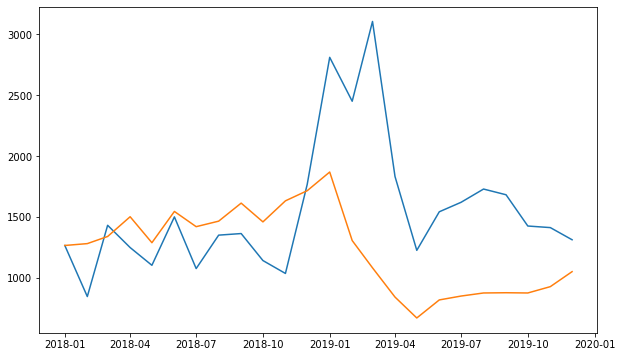

In [137]:
pridictions_ARIMA = np.exp(pridictions_ARIMA_log)
plt.plot(indexedDataset)
plt.plot(pridictions_ARIMA)

In [138]:
indexedDataset_logScale

,Export
Month,
2018-01-01,7.142037
2018-02-01,6.738152
2018-03-01,7.265430
2018-04-01,7.128496
2018-05-01,7.003974
2018-06-01,7.312553
2018-07-01,6.979145
2018-08-01,7.207119
2018-09-01,7.216709


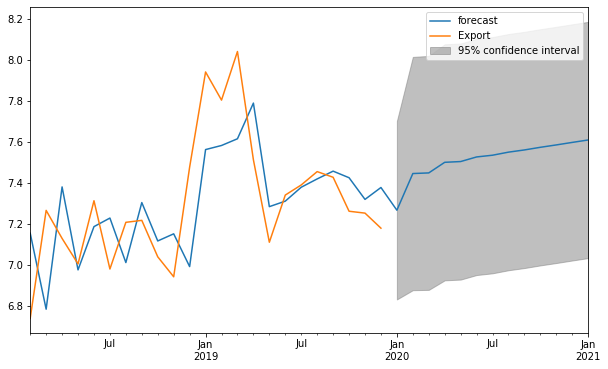

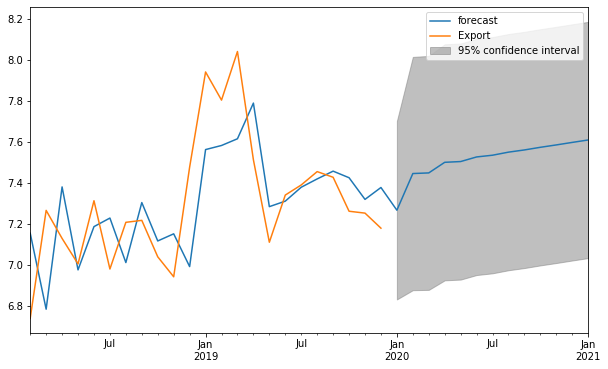

In [139]:
results_ARIMA.plot_predict(1,36)



In [140]:
results_ARIMA.forecast(steps=12)

(array([7.26625027, 7.44529707, 7.44837321, 7.50015893, 7.50386415,
        7.52633176, 7.53480273, 7.54978774, 7.56053236, 7.573441  ,
        7.58503494, 7.59733297]),
 array([0.22223975, 0.29057025, 0.29136604, 0.29404299, 0.29404586,
        0.29419269, 0.29419798, 0.29420786, 0.29420891, 0.29420969,
        0.29420983, 0.2942099 ]),
 array([[6.83066838, 7.70183217],
        [6.87578984, 8.0148043 ],
        [6.87730628, 8.01944015],
        [6.92384527, 8.07647259],
        [6.92754486, 8.08018344],
        [6.94972468, 8.10293885],
        [6.95818529, 8.11142016],
        [6.97315093, 8.12642456],
        [6.9838935 , 8.13717123],
        [6.9968006 , 8.15008139],
        [7.00839427, 8.16167561],
        [7.02069216, 8.17397377]]))

In [141]:
x=results_ARIMA.forecast(steps=12)
print(x[0])


[7.26625027 7.44529707 7.44837321 7.50015893 7.50386415 7.52633176
 7.53480273 7.54978774 7.56053236 7.573441   7.58503494 7.59733297]


In [142]:
print(np.exp(x[0]))

[1431.17386848 1711.7937442  1717.06756987 1808.32978851 1815.0424818
 1856.28371329 1872.07501101 1900.33932699 1920.86784166 1945.8243552
 1968.51541545 1992.87374297]
